# TikTok - Statistical Review

This work focuses on applying statistical analysis to interpret data, covering key concepts such as descriptive statistics and hypothesis testing. The analysis involves examining the provided data through A/B testing and hypothesis testing. The objective is to utilize descriptive statistics and hypothesis testing to explore whether a link exists explore the link between a user's verified status and the number of video views.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
# reading the data
df = pd.read_csv("tiktok_dataset.csv").dropna(axis=0)
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [17]:
# calculating the mean number of views for each verification status
views_by_verified_type = df.groupby("verified_status").mean(numeric_only=True)[["video_view_count"]]
views_by_verified_type.head()

,video_view_count
verified_status,
not verified,265663.785339
verified,91439.164167


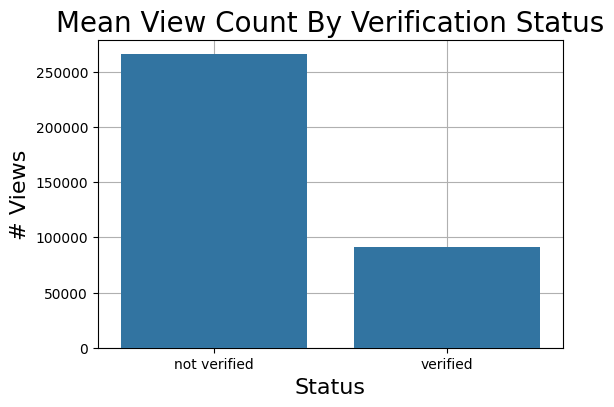

In [18]:
# creating bar plot for mean number of views by verification status
plt.figure(figsize=(6,4))
ax = sns.barplot(x=views_by_verified_type.index,
                 y=views_by_verified_type["video_view_count"],
                 zorder=3)
plt.title("Mean View Count By Verification Status", fontsize=20)
plt.ylabel("# Views", fontsize=16)
plt.xlabel("Status", fontsize=16)
plt.grid(zorder=0)

Descriptive statistics simplify the process of understanding large datasets by summarizing them. Calculating the mean video view count for both verified and unverified accounts provides a quick way to compare the groups. We observe a difference between the two averages, but this difference could be due to random variation rather than a true distinction. A hypothesis test is needed to determine if the difference is statistically meaningful.

* Null Hypothesis (H₀): There is no difference in average views between videos from verified and unverified accounts.
* Alternative Hypothesis (H₁): There is a difference in average views between videos from verified and unverified accounts.

In [19]:
# statistical significance
threshold = 0.05

In [20]:
# hypothesis testing
verified = df[df["verified_status"] == "verified"]["video_view_count"]
not_verified = df[df["verified_status"] == "not verified"]["video_view_count"]
res = stats.ttest_ind(a=not_verified, b=verified, equal_var=False)
p = res[1]
print(res)
print("p =", p)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)
p = 2.6088823687177823e-120


In [21]:
if p < threshold:
    print("We reject the null hypothesis.")
else:
    print("We do not reject the null hypothesis.")

We reject the null hypothesis.


The hypothesis test indicates a statistically significant difference in the average view counts between verified and unverified accounts. This points to possible underlying differences in user behavior between these groups. Further exploration is needed to understand the reasons behind these differences. For instance, do unverified users create content designed to attract more views or could they be utilizing bots for increased engagement? A logical next step would be building a regression model for verified status, especially as the ultimate aim is to predict claim status. This model would help better understand user behavior among verified users. Given the skewed data and significant differences between account types, using a logistic regression model is recommended for accuracy.